In [36]:
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd

# Number of transits and points per transit
number_of_transits = 3  # You can change this to the desired number of transits

impact_factor_1 = 0
impact_factor_2 = 0.25

angle_degrees = [0, 45, 90]
angle_radians = []
for angle in angle_degrees:
    radian_angle = math.radians(angle)
    angle_radians.append(radian_angle)
angle_radians = np.round(angle_radians, 4)

x_coords_zero_pos = np.array([0.375, 0.6375, 0.9])
x_coords_zero_neg = -np.flip(x_coords_zero_pos)
x_coords_zero = np.concatenate((x_coords_zero_neg, x_coords_zero_pos))
y_coords_zero = np.zeros(6)
y_coords_offset = [-0.25, -0.25, -0.25, -0.25, -0.25, -0.25]

velocity = 1
print(angle_radians)
print(x_coords_zero)

[0.     0.7854 1.5708]
[-0.9    -0.6375 -0.375   0.375   0.6375  0.9   ]


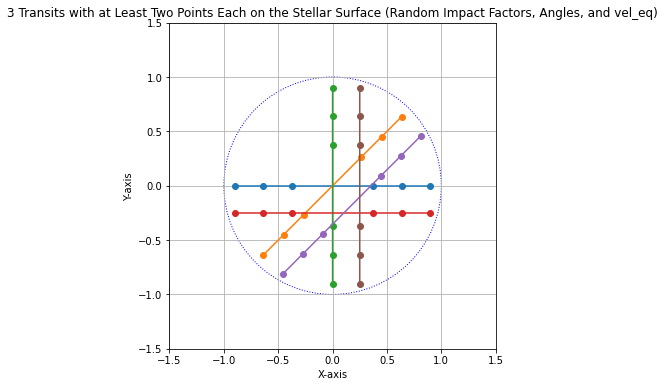

  Angle (radians) Impact Factors
0               0              0
1          0.7854              0
2          1.5708              0
3               0           0.25
4          0.7854           0.25
5          1.5708           0.25


/projects/anaconda38/envs/py36new/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [37]:
# Initialize a list to store transit coordinates
transits = []

# Function to generate a transit with at least two points
def generate_transit(b_value, angle, x_coords, y_coords):
    transit = []
    
    # Generate a random angle between 0 and π (0 to 180 degrees)
    angle = angle

    # Generate random y-coordinates within the transit and filter out points outside the unit circle
    for i in range(len(x_coords)):
        y_coord = y_coords[i]  # Add 0.25 to each y-coordinate
        x_coord = x_coords[i]

        # Check if the point is within the unit circle
        if x_coord**2 + y_coord**2 <= 1:
            transit.append((x_coord, y_coord))
    
    # Check if the transit has at least two points
    min_points_per_transit = 2
    if len(transit) >= min_points_per_transit:
        
        # Rotate the transit points by the angle
        x_coords, y_coords = zip(*transit)
        x_rotated = [x * np.cos(angle) - y * np.sin(angle) for x, y in zip(x_coords, y_coords)]
        y_rotated = [x * np.sin(angle) + y * np.cos(angle) for x, y in zip(x_coords, y_coords)]
        
        transit = list(zip(x_rotated, y_rotated))
        
        return angle, b_value, transit
    else:
        # If not, regenerate the transit
        return generate_transit(b_value, x, y, x_coords, y_coords)

# Generate and append transits with at least two points and "vel_eq" values
for angle in range(len(angle_degrees)):
    angle, b_value, transit = generate_transit(impact_factor_1, angle_radians[angle], x_coords_zero, y_coords_zero)
    transits.append((angle, b_value, transit))
for angle in range(len(angle_degrees)):
    angle, b_value, transit = generate_transit(impact_factor_2, angle_radians[angle], x_coords_zero, y_coords_offset)
    transits.append((angle, b_value, transit))

# Plot the transits on the stellar surface
fig, ax = plt.subplots(figsize=(6, 6))
stellar_surface = plt.Circle((0, 0), 1, fill=False, color='b', linestyle='dotted')
ax.add_artist(stellar_surface)

for angle, _, transit in transits:
    transit = np.array(transit)
    x_coords, y_coords = transit[:, 0], transit[:, 1]
    plt.plot(x_coords, y_coords, marker='o')

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f'{number_of_transits} Transits with at Least Two Points Each on the Stellar Surface (Random Impact Factors, Angles, and vel_eq)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

# Save the transit information to a NumPy file
np.savez(f"systematic_transit_data.npz", transits=transits)

# Load the previously created NumPy file
data = np.load(f"systematic_transit_data.npz", allow_pickle=True)

# Extract the transit information
transits = data['transits']

# Create a DataFrame for analysis
df = pd.DataFrame(transits, columns=['Angle (radians)', 'Impact Factors', 'Coordinates'])

# Drop the coordinates and vel_eq columns
df.drop(columns=['Coordinates'], inplace=True)

# Display the statistics
print(df)